In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


In [2]:
df = pd.read_excel('data/raw/Online Retail.xlsx')

In [13]:
df.head(500)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495,536409,20669,RED HEART LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
496,536409,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
497,536409,90210B,CLEAR ACRYLIC FACETED BANGLE,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [16]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [20]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Feature Engineering for Customer Segmentation
Recency (R): How recently a customer made a purchase (days since last purchase).
Frequency (F): Total number of purchases made.
Monetary Value (M): Total money spent by the customer.

In [ ]:
Feature Engineering for Customer Segmentation
Recency (R): How recently a customer made a purchase (days since last purchase).
Frequency (F): Total number of purchases made.
Monetary Value (M): Total money spent by the customer.

In [5]:
df = df.dropna(subset=['CustomerID'])

In [6]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [12]:
# Finding the number of data having negative quantity
df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].shape[0]/df.shape[0]

0.9780128751883469

In [14]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [15]:
latest_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
latest_date

Timestamp('2011-12-10 12:50:00')

In [16]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum()  # Monetary
})


In [17]:
# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Reset index
rfm.reset_index(inplace=True)


In [18]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,278,1,180.60
4334,18281.0,181,1,80.82
4335,18282.0,8,2,178.05
4336,18283.0,4,16,2094.88


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


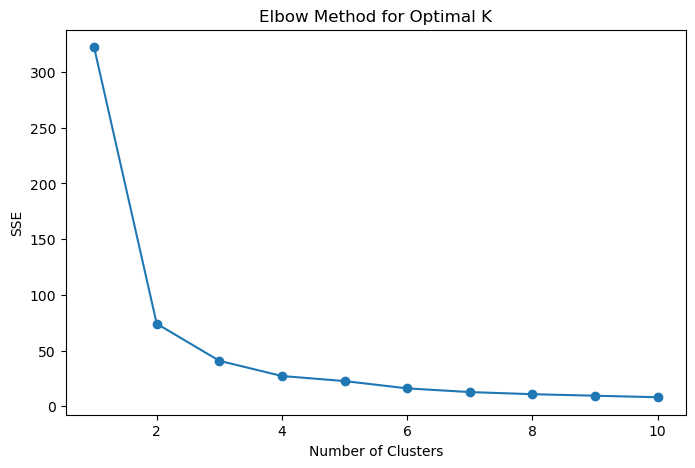

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find optimal clusters using Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()


In [21]:
# Apply K-Means with optimal K (e.g., K=4)
kmeans = KMeans(n_clusters=2, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [22]:
rfm.groupby('Cluster').mean()


,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15284.572260,41.462339,5.143601,2515.229686
1,15348.653918,248.140858,1.616604,649.876633


c:\Users\Public\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


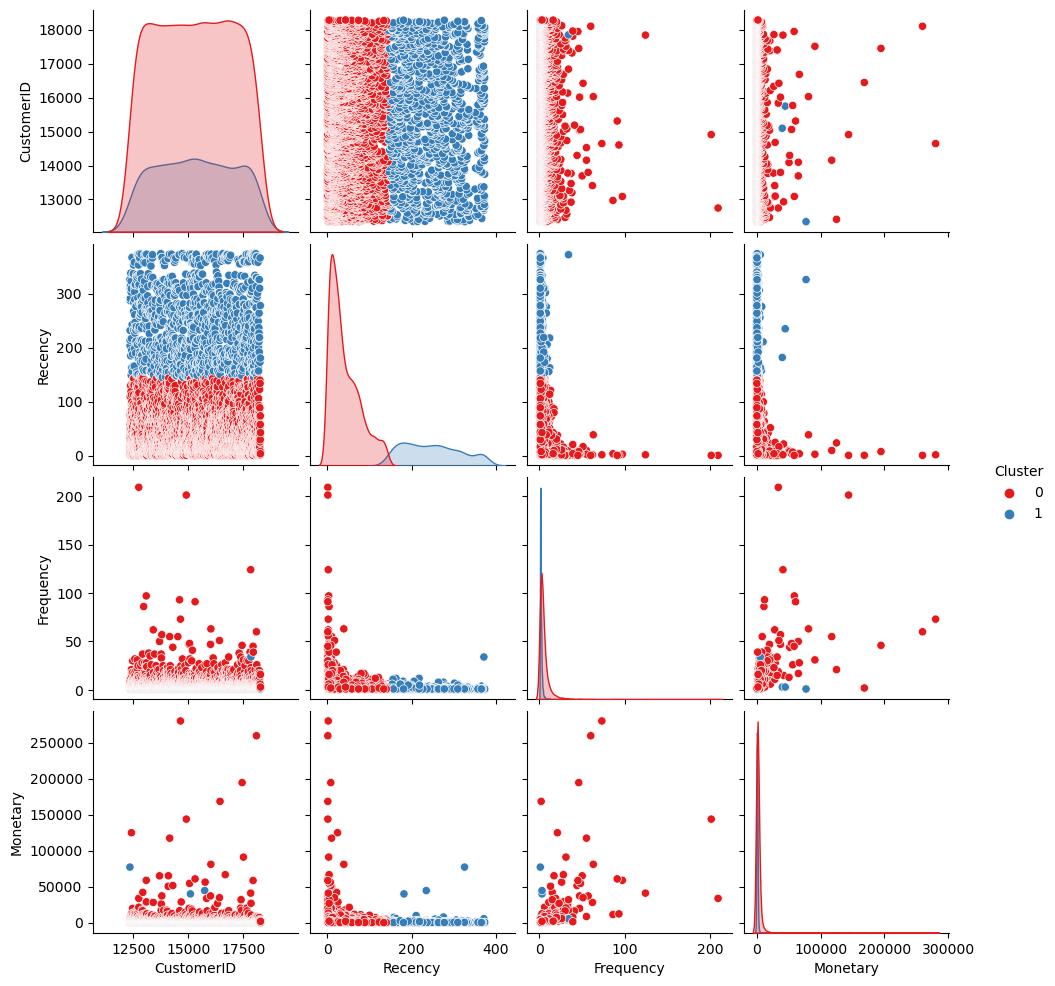

In [24]:
import seaborn as sns
sns.pairplot(rfm, hue="Cluster", palette="Set1", diag_kind="kde")
plt.show()


In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create a customer-product matrix
customer_product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)

customer_product_matrix


StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Converting column names to string
for col in customer_product_matrix.columns:
    customer_product_matrix.rename(columns={col: str(col)}, inplace=True)
    
# Reduce dimensions using PCA
pca = PCA(n_components=10)  # Keep top 10 principal components
reduced_data = pca.fit_transform(customer_product_matrix)



In [28]:
reduced_data

array([[-1.21301353e+02,  7.41969189e+04, -4.24359154e+01, ...,
         8.81999140e+00, -2.98041462e+00, -1.94037042e+01],
       [-1.86655399e+01, -1.79587523e+01,  3.60005186e+01, ...,
        -4.75312375e+01, -6.65759596e-02, -3.07558471e+00],
       [-1.86855783e+01, -1.79379112e+01,  3.48562988e+01, ...,
        -4.79996257e+01,  1.33825900e+01,  1.09181127e+02],
       ...,
       [-1.86203527e+01, -1.79903475e+01, -3.30613552e+01, ...,
        -7.26096839e+00, -2.92197100e+00, -8.65832166e+00],
       [-1.86539729e+01, -1.79819397e+01,  5.44815232e+00, ...,
         7.06233884e+00, -4.54108671e+00, -4.18277999e+00],
       [-1.86292598e+01, -1.79948786e+01, -2.90298133e+01, ...,
        -7.17180071e+00, -2.75752933e+00, -8.26651691e+00]])

In [29]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_product_matrix['Cluster'] = kmeans.fit_predict(reduced_data)

print(customer_product_matrix.head())


StockCode   10002  10080  10120  10125  10133  10135  11001  15030  15034  \
CustomerID                                                                  
12346.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12347.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12348.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12349.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12350.0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

StockCode   15036  ...  90214W  90214Y  90214Z  BANK CHARGES   C2  DOT    M  \
CustomerID         ...                                                        
12346.0       0.0  ...     0.0     0.0     0.0           0.0  0.0  0.0  0.0   
12347.0       0.0  ...     0.0     0.0     0.0           0.0  0.0  0.0  0.0   
12348.0       0.0  ...     0.0     0.0     0.0           0.0  0.0  0.0  0.0   
12349.0       0.0  ...     0.0     0.0     0.0           0.0  0.0

In [30]:
# Assign cluster labels back to the original data
df = df.merge(customer_product_matrix[['Cluster']], on='CustomerID', how='left')

In [31]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


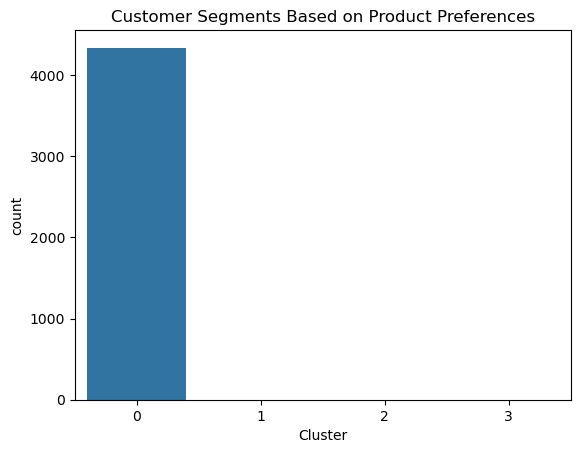

StockCode     10002     10080     10120    10125     10133     10135  \
Cluster                                                                
0          0.189894  0.067144  0.044532  0.28288  0.550069  0.447162   
1          0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
2          0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
3          0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   

StockCode       11001     15030    15034     15036  ...   90214V    90214W  \
Cluster                                             ...                      
0            0.181818  0.032995  1.48108  5.047531  ...  0.00323  0.002769   
1            0.000000  0.000000  0.00000  0.000000  ...  0.00000  0.000000   
2            0.000000  0.000000  0.00000  0.000000  ...  0.00000  0.000000   
3          232.000000  0.000000  0.00000  0.000000  ...  0.00000  0.000000   

StockCode    90214Y    90214Z  BANK CHARGES        C2       DOT          M  \
Cluster             

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of customers in each cluster
sns.countplot(x=customer_product_matrix['Cluster'])
plt.title("Customer Segments Based on Product Preferences")
plt.show()

# Average number of unique products bought per cluster
cluster_analysis = customer_product_matrix.groupby('Cluster').mean()
print(cluster_analysis.head())
